In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import mglearn

In [5]:
import pandas as pd

In [6]:
import tensorflow.contrib.keras as kr

In [7]:
import tensorflow as tf

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
from sklearn.metrics import confusion_matrix

In [10]:
with open('E://cnews/cnews.vocab.txt', encoding='utf8') as file:
    vocabulary_list = [k.strip() for k in file.readlines()]
#读取词表
with open('E://cnews/cnews.train.txt', encoding='utf8') as file:
    line_list = [k.strip() for k in file.readlines()]
    #读取每行
    train_label_list = [k.split()[0] for k in line_list]
    #将标签依次取出
    train_content_list = [k.split(maxsplit=1)[1] for k in line_list]
    #将内容依次取出,此处注意split()选择最大分割次数为1,否则句子被打断.
#同理读取test数据
with open('E://cnews/cnews.test.txt', encoding='utf8') as file:
    line_list = [k.strip() for k in file.readlines()]
    test_label_list = [k.split()[0] for k in line_list]
    test_content_list = [k.split(maxsplit=1)[1] for k in line_list]

In [11]:
word2id_dict = dict(((b, a) for a, b in enumerate(vocabulary_list)))
def content2vector(content_list):
    content_vector_list = []
    for content in content_list:
        content_vector = []
        for word in content:
            if word in word2id_dict:
                content_vector.append(word2id_dict[word])
            else:
                content_vector.append(word2id_dict['<PAD>'])
        content_vector_list.append(content_vector)
    return content_vector_list
train_vector_list = content2vector(train_content_list)
test_vector_list = content2vector(test_content_list)

print(len(train_content_list[0]))
print(len(train_vector_list[:1][0]))
print('************************************')
print(len(test_content_list[0]))
print(len(test_vector_list[:1][0]))

746
746
************************************
1720
1720


In [14]:
train_vector_list[15]

[1056,
 328,
 610,
 575,
 580,
 1175,
 387,
 1111,
 579,
 9,
 1061,
 1676,
 0,
 424,
 327,
 757,
 656,
 306,
 667,
 148,
 995,
 107,
 587,
 164,
 58,
 499,
 134,
 409,
 600,
 226,
 259,
 27,
 123,
 12,
 12,
 70,
 55,
 62,
 87,
 961,
 154,
 1429,
 27,
 123,
 12,
 12,
 70,
 83,
 62,
 85,
 378,
 365,
 1,
 327,
 757,
 6,
 453,
 460,
 950,
 100,
 59,
 1,
 6,
 976,
 1253,
 11,
 169,
 107,
 36,
 10,
 977,
 851,
 3,
 977,
 851,
 319,
 920,
 59,
 1,
 387,
 1111,
 286,
 264,
 10,
 224,
 98,
 2,
 569,
 692,
 1,
 127,
 185,
 327,
 757,
 716,
 153,
 306,
 41,
 6,
 148,
 995,
 27,
 884,
 667,
 32,
 107,
 587,
 164,
 3,
 816,
 125,
 39,
 669,
 1623,
 2,
 81,
 212,
 11,
 1,
 71,
 59,
 27,
 884,
 387,
 1111,
 2,
 107,
 587,
 1041,
 307,
 31,
 233,
 1086,
 157,
 9,
 107,
 219,
 327,
 757,
 580,
 202,
 10,
 71,
 59,
 1285,
 553,
 2,
 112,
 35,
 3,
 387,
 1111,
 84,
 38,
 23,
 143,
 153,
 1,
 250,
 5,
 22,
 580,
 417,
 2,
 1177,
 873,
 1,
 548,
 417,
 9,
 41,
 333,
 130,
 37,
 42,
 3,
 28,
 40,
 31,
 59,


In [12]:
vocab_size = 5000  # 词汇表达小
seq_length = 600  # 句子序列长度
num_classes = 10  # 类别数

In [15]:
train_X = kr.preprocessing.sequence.pad_sequences(train_vector_list,600)
test_X = kr.preprocessing.sequence.pad_sequences(test_vector_list,600)

In [16]:
train_X[15]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0, 1056,  328,  610,  575,  580, 1175,  387, 1111,  579,
          9, 1061, 1676,    0,  424,  327,  757,  656,  306,  667,  148,
        995,  107,  587,  164,   58,  499,  134,  409,  600,  226,  259,
         27,  123,   12,   12,   70,   55,   62,   87,  961,  154, 1429,
         27,  123,   12,   12,   70,   83,   62,   85,  378,  365,    1,
        327,  757,    6,  453,  460,  950,  100,   59,    1,    6,  976,
       1253,   11,  169,  107,   36,   10,  977,  851,    3,  977,  851,
        319,  920,   59,    1,  387, 1111,  286,  264,   10,  224,   98,
          2,  569,  692,    1,  127,  185,  327,  7

In [14]:
label = LabelEncoder()
train_Y = kr.utils.to_categorical(label.fit_transform(train_label_list),num_classes=num_classes)
test_Y = kr.utils.to_categorical(label.fit_transform(test_label_list),num_classes=num_classes)

In [15]:
train_Y.shape[0]
train_Y[:2]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [16]:
X_holder = tf.placeholder(tf.int32,[None,seq_length])
#X的占位符由于句子是由id组成的向量，而id为int类型，
#所以定义x的传入数据为tf.int32类型，
#None表示可以传任意组X，seq_length表示词向量维度。
Y_holder = tf.placeholder(tf.float32,[None,num_classes])
#同理Y占位符向量维度为10，也即num_classes。

In [17]:
embedding_dim = 128  # 词向量维度
num_filters = 256  # 卷积核数目（有多少个卷积核就有多少个feature map）
kernel_size = 8  # 卷积核尺寸
hidden_dim = 128  # 全连接层神经元
dropout_keep_prob = 0.5  # dropout保留比例
learning_rate = 1e-3  # 学习率
batch_size = 64  # 每批训练大小

In [18]:
embedding = tf.get_variable('embedding', [vocab_size, embedding_dim])
#embedding字典维度为5000*128,128为词向量维度
embedding_outputs = tf.nn.embedding_lookup(embedding, X_holder)
#embedding_outputs的维度为(batch_size)64*600*128

In [19]:
conv1 = tf.layers.conv1d(inputs=embedding_outputs,filters=num_filters,kernel_size=kernel_size)
max_pool = tf.reduce_max(conv1,reduction_indices=[1])
full_connect = tf.layers.dense(max_pool,hidden_dim)

In [20]:
full_connect_dropout = tf.contrib.layers.dropout(full_connect,keep_prob=0.8)
full_connect_activate = tf.nn.relu(full_connect_dropout)
full_connect_last = tf.layers.dense(full_connect_activate,num_classes)
predict_y = tf.nn.softmax(full_connect_last)

In [21]:
cross_entry = tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y_holder,logits=full_connect_last)
loss = tf.reduce_mean(cross_entry)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(loss)

In [22]:
correct = tf.equal(tf.argmax(Y_holder,1),tf.argmax(predict_y,1))
accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))

In [23]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [24]:
import random
for i in range(5000):
    train_index = random.sample(list(range(len(train_Y))),k=batch_size)
    X = train_X[train_index]
    Y = train_Y[train_index]
    sess.run(train,feed_dict={X_holder:X,Y_holder:Y})
    step = i + 1 
    if step % 100 == 0:
        test_index = random.sample(list(range(len(test_Y))), k=200)
        x = test_X[test_index]
        y = test_Y[test_index]
        loss_value, accuracy_value = sess.run([loss, accuracy], {X_holder:x, Y_holder:y})
        print('step:%d loss:%.4f accuracy:%.4f' %(step, loss_value, accuracy_value))

step:100 loss:0.7095 accuracy:0.7850
step:200 loss:0.4253 accuracy:0.8750
step:300 loss:0.2715 accuracy:0.9050
step:400 loss:0.2200 accuracy:0.9450
step:500 loss:0.2234 accuracy:0.9350
step:600 loss:0.1757 accuracy:0.9550
step:700 loss:0.1443 accuracy:0.9550
step:800 loss:0.1074 accuracy:0.9650
step:900 loss:0.2531 accuracy:0.9350
step:1000 loss:0.0705 accuracy:0.9700
step:1100 loss:0.0934 accuracy:0.9700
step:1200 loss:0.1395 accuracy:0.9600
step:1300 loss:0.1672 accuracy:0.9300
step:1400 loss:0.1517 accuracy:0.9450
step:1500 loss:0.2053 accuracy:0.9500
step:1600 loss:0.2610 accuracy:0.9350
step:1700 loss:0.0986 accuracy:0.9650
step:1800 loss:0.0622 accuracy:0.9800
step:1900 loss:0.1535 accuracy:0.9550
step:2000 loss:0.1363 accuracy:0.9500
step:2100 loss:0.1220 accuracy:0.9750
step:2200 loss:0.1082 accuracy:0.9750
step:2300 loss:0.1000 accuracy:0.9700
step:2400 loss:0.1790 accuracy:0.9550
step:2500 loss:0.1948 accuracy:0.9400
step:2600 loss:0.1598 accuracy:0.9450
step:2700 loss:0.2350

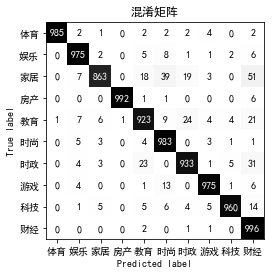

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
def predictAll(test_X, batch_size=100):
    predict_value_list = []
    for i in range(0, len(test_X), batch_size):
        X = test_X[i: i + batch_size]
        predict_value = sess.run(predict_y, {X_holder:X})
        predict_value_list.extend(predict_value)
    return np.array(predict_value_list)

Y = predictAll(test_X)
y = np.argmax(Y, axis=1)
predict_label_list = label.inverse_transform(y)
score_image = mglearn.tools.heatmap(confusion_matrix(test_label_list, predict_label_list),
                                    xlabel='Predicted label',ylabel='True label',xticklabels=label.classes_,
                                    yticklabels=label.classes_,cmap=plt.cm.gray_r,fmt='%d')
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('混淆矩阵')
plt.gca().invert_yaxis()

In [26]:
from sklearn.metrics import precision_recall_fscore_support

def eval_model(y_true, y_pred, labels):
    # 计算每个分类的Precision, Recall, f1, support
    p, r, f1, s = precision_recall_fscore_support(y_true, y_pred)
    # 计算总体的平均Precision, Recall, f1, support
    tot_p = np.average(p, weights=s)
    tot_r = np.average(r, weights=s)
    tot_f1 = np.average(f1, weights=s)
    tot_s = np.sum(s)
    res1 = pd.DataFrame({
        u'Label': labels,
        u'Precision': p,
        u'Recall': r,
        u'F1': f1,
        u'Support': s
    })
    res2 = pd.DataFrame({
        u'Label': ['总体'],
        u'Precision': [tot_p],
        u'Recall': [tot_r],
        u'F1': [tot_f1],
        u'Support': [tot_s]
    })
    res2.index = [999]
    res = pd.concat([res1, res2])
    return res[['Label', 'Precision', 'Recall', 'F1', 'Support']]

eval_model(test_label_list, predict_label_list, label.classes_)

,Label,Precision,Recall,F1,Support
0,体育,0.998986,0.9850,0.991944,1000
1,娱乐,0.970149,0.9750,0.972569,1000
2,家居,0.977350,0.8630,0.916622,1000
3,房产,0.998993,0.9920,0.995484,1000
4,教育,0.938008,0.9230,0.930444,1000
5,时尚,0.926484,0.9830,0.953906,1000
6,时政,0.948171,0.9330,0.940524,1000
7,游戏,0.977934,0.9750,0.976465,1000
8,科技,0.986639,0.9600,0.973137,1000
9,财经,0.878307,0.9960,0.933458,1000
